## **Exploratory Notebook (EDA)**

In [1]:
#Import necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

import folium
import geopandas as gpd
import ipywidgets as widgets
from IPython.display import display
import geopandas as gpd


In [2]:
#Import data from compiled .csv file 

fish_stock_data = pd.read_csv('Stocking_All_Years.csv')
fish_stock_data.rename(columns={'Spieces':'Species', 'Quanty':'Quantity'}, inplace=True) #Renaming misspelled column names 
fish_stock_data

,Water Name,County,Species,Quantity,Average Length,Date Stocked
0,ABERDUNK L FL,SEVIER,TIGER TROUT,103,2.68,06/24/2024
1,ABES RES,SEVIER,CUTTHROAT,100,1.93,09/12/2024
2,ACADEMY MILL RES,SANPETE,TIGER TROUT,3006,2.68,06/25/2024
3,ADAMS RESERVOIR,DAVIS,RAINBOW,1102,9.68,03/05/2024
4,ADAMS RESERVOIR,DAVIS,RAINBOW,1395,9.52,03/12/2024
...,...,...,...,...,...,...
54973,YELLOW LAKE NCL,GARFIELD,BROOK TROUT,252,2.88,7/8/2002
54974,"YELLOWPINE,LOWER W66",SUMMIT,BROOK TROUT,199,2.54,6/24/2002
54975,"YELLOWPINE,UPPER W65",SUMMIT,BROOK TROUT,306,2.54,6/24/2002
54976,YELLOWSTONE R,DUCHESNE,RAINBOW,998,8.95,5/16/2002


In [3]:
#Combining data where only 'Quantity' value is different, to compile stock instances on same day

fish_stock_data = fish_stock_data.groupby(['Water Name', 'County', 'Species', 'Average Length', 'Date Stocked']).agg({"Quantity": 'sum'}).reset_index()
fish_stock_data

,Water Name,County,Species,Average Length,Date Stocked,Quantity
0,12 SECRET,SANPETE,BROOK TROUT,3.04,7/17/2002,178
1,ABERDUNK L FL,SEVIER,TIGER TROUT,2.34,7/7/2010,195
2,ABERDUNK L FL,SEVIER,TIGER TROUT,2.68,06/24/2024,103
3,ABERDUNK L FL,SEVIER,TIGER TROUT,2.71,6/25/2018,101
4,ABERDUNK L FL,SEVIER,TIGER TROUT,2.71,6/26/2017,100
...,...,...,...,...,...,...
46592,YUBA RES (SEVIER BRG,JUAB,WIPER,8.28,5/14/2020,2099
46593,YUBA RES (SEVIER BRG,JUAB,WIPER,8.41,5/14/2020,1596
46594,YUBA RES (SEVIER BRG,JUAB,WIPER,8.42,7/17/2023,2204
46595,YUBA RES (SEVIER BRG,JUAB,WIPER,8.42,7/19/2023,3900


In [4]:
# Iterate through values in 'Water Name' and add corresponding water body type in new column

river_values = [' R']
pond_values = [' POND', ' P ', 'PARK', 'WPA', ' PND', ' PONDS', ' PD', ' Pond']
creek_values = [' CR', ' CREEK']
res_values = ['RES', 'Res', 'RESERVOIR', 'Reservoir']
lake_values = [' L', ' LAKES', ' LAKE', ' Lake']
fishery_values = [' FISHERY', ' Fishery', 'BLUE RIBBON']

for i, row in fish_stock_data.iterrows():
    water_name = row['Water Name']
    if any(value in water_name for value in fishery_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'Fishery'
    elif any(value in water_name for value in res_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'Reservoir'
    elif any(value in water_name for value in lake_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'Lake'
    elif any(value in water_name for value in pond_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'Pond'
    elif any(value in water_name for value in river_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'River'
    elif any(value in water_name for value in creek_values):
        fish_stock_data.at[i, 'Water Body Type'] = 'Creek'
    else:
        fish_stock_data.at[i, 'Water Body Type'] = 'Other'

fish_stock_data


,Water Name,County,Species,Average Length,Date Stocked,Quantity,Water Body Type
0,12 SECRET,SANPETE,BROOK TROUT,3.04,7/17/2002,178,Other
1,ABERDUNK L FL,SEVIER,TIGER TROUT,2.34,7/7/2010,195,Lake
2,ABERDUNK L FL,SEVIER,TIGER TROUT,2.68,06/24/2024,103,Lake
3,ABERDUNK L FL,SEVIER,TIGER TROUT,2.71,6/25/2018,101,Lake
4,ABERDUNK L FL,SEVIER,TIGER TROUT,2.71,6/26/2017,100,Lake
...,...,...,...,...,...,...,...
46592,YUBA RES (SEVIER BRG,JUAB,WIPER,8.28,5/14/2020,2099,Reservoir
46593,YUBA RES (SEVIER BRG,JUAB,WIPER,8.41,5/14/2020,1596,Reservoir
46594,YUBA RES (SEVIER BRG,JUAB,WIPER,8.42,7/17/2023,2204,Reservoir
46595,YUBA RES (SEVIER BRG,JUAB,WIPER,8.42,7/19/2023,3900,Reservoir


In [5]:
#Checking for any missing or null values 

null_values = fish_stock_data.isnull().sum()
print(null_values)

Water Name         0
County             0
Species            0
Average Length     0
Date Stocked       0
Quantity           0
Water Body Type    0
dtype: int64


In [6]:
# Summary of basic data features 

fish_stock_data.describe(include='all')

,Water Name,County,Species,Average Length,Date Stocked,Quantity,Water Body Type
count,46597,46597,46597,46597.000000,46597,4.659700e+04,46597
unique,1257,29,33,NaN,4569,NaN,7
top,STRAWBERRY RES,UTAH,RAINBOW,NaN,6/25/2018,NaN,Lake
freq,1063,4684,28548,NaN,95,NaN,13480
mean,NaN,NaN,NaN,8.346806,NaN,4.780183e+03,NaN
std,NaN,NaN,NaN,3.894497,NaN,2.548736e+04,NaN
min,NaN,NaN,NaN,0.200000,NaN,0.000000e+00,NaN
25%,NaN,NaN,NaN,4.660000,NaN,4.190000e+02,NaN
50%,NaN,NaN,NaN,9.470000,NaN,8.030000e+02,NaN
75%,NaN,NaN,NaN,10.340000,NaN,2.000000e+03,NaN


In [7]:
number_unique_fish_names = fish_stock_data['Species'].nunique()
print("Total number of unique fish species:", number_unique_fish_names)

Total number of unique fish species: 33


In [8]:
number_unique_water_names = fish_stock_data['Water Name'].nunique()
print("Total number of unique bodies of water:", (number_unique_water_names))

Total number of unique bodies of water: 1257


In [9]:
number_unique_water_body_types = fish_stock_data['Water Body Type'].nunique()
print("Total number of unique types of bodies of water:", number_unique_water_body_types)

Total number of unique types of bodies of water: 7


In [10]:
#List of top 5 fish species that are stocked the most

top_5_fish_species = fish_stock_data.groupby('Species')['Quantity'].sum().nlargest(5).reset_index(name='Total Quantity')
top_5_fish_species

,Species,Total Quantity
0,RAINBOW,88031398
1,CUTTHROAT,44812501
2,KOKANEE,24237498
3,WALLEYE,24050272
4,TIGER TROUT,10408311


In [11]:
#Listing top 10 stocking locations by county

top_10_watername_per_county = fish_stock_data.groupby('County')['Water Name'].value_counts().groupby(level=0).head(10).reset_index(name='Count')
top_10_watername_per_county

,County,Water Name,Count
0,BEAVER,BEAVER R,169
1,BEAVER,LITTLE RES,144
2,BEAVER,"KENTS L, MIDDLE",137
3,BEAVER,MINERSVILLE RES,134
4,BEAVER,LABARON RES,105
...,...,...,...
277,WEBER,WEBER R,112
278,WEBER,FT BUENAVENTURA P,82
279,WEBER,CAUSEY RES,70
280,WEBER,FOUR MILE CR,32


In [12]:
top_200_watername_locations = fish_stock_data.groupby('Water Name')['Quantity'].sum().nlargest(200).reset_index(name='Total Quantity')
top_200_watername_locations

#Top 200 areas total? Maybe filter by year or select further? 

,Water Name,Total Quantity
0,STRAWBERRY RES,44000445
1,FLAMING GORGE RES,17256744
2,WILLARD BAY RES,16654214
3,FISH L,9230147
4,OTTER CR RES,8427041
...,...,...
195,LAKE FK R,101598
196,AMERICAN FK CR,100909
197,FERRON CR,100497
198,SILVER L,99663


In [13]:
fish_stock_data['Date Stocked'] = pd.to_datetime(fish_stock_data['Date Stocked'])

fish_stock_data['Year'] = fish_stock_data['Date Stocked'].dt.year.astype('Int64')
fish_stock_data['Month'] = fish_stock_data['Date Stocked'].dt.month.astype('Int64')
fish_stock_data['Day'] = fish_stock_data['Date Stocked'].dt.day.astype('Int64')

fish_stock_data

,Water Name,County,Species,Average Length,Date Stocked,Quantity,Water Body Type,Year,Month,Day
0,12 SECRET,SANPETE,BROOK TROUT,3.04,2002-07-17,178,Other,2002,7,17
1,ABERDUNK L FL,SEVIER,TIGER TROUT,2.34,2010-07-07,195,Lake,2010,7,7
2,ABERDUNK L FL,SEVIER,TIGER TROUT,2.68,2024-06-24,103,Lake,2024,6,24
3,ABERDUNK L FL,SEVIER,TIGER TROUT,2.71,2018-06-25,101,Lake,2018,6,25
4,ABERDUNK L FL,SEVIER,TIGER TROUT,2.71,2017-06-26,100,Lake,2017,6,26
...,...,...,...,...,...,...,...,...,...,...
46592,YUBA RES (SEVIER BRG,JUAB,WIPER,8.28,2020-05-14,2099,Reservoir,2020,5,14
46593,YUBA RES (SEVIER BRG,JUAB,WIPER,8.41,2020-05-14,1596,Reservoir,2020,5,14
46594,YUBA RES (SEVIER BRG,JUAB,WIPER,8.42,2023-07-17,2204,Reservoir,2023,7,17
46595,YUBA RES (SEVIER BRG,JUAB,WIPER,8.42,2023-07-19,3900,Reservoir,2023,7,19


In [14]:
# Number of unique water name locations
num_water_names = fish_stock_data['Water Name'].nunique()

# Number of unique species
num_species = fish_stock_data['Species'].nunique()

# Number of unique water body types
num_water_body_types = fish_stock_data['Water Body Type'].nunique()

# Average number of fish stocked per year
avg_fish_stocked_per_year = fish_stock_data.groupby('Year')['Quantity'].sum().mean()

# Creating a table to be used in explanatory notebook
summary_table = pd.DataFrame({
    'Utah Water, Fish, and Stocking Information': ['Number of Water Name Locations', 'Number of Species', 'Number of Water Body Types', 'Average Number of Fish Stocked per Year'],
    'Count': [num_water_names, num_species, num_water_body_types, avg_fish_stocked_per_year]
})

# Changing Value f
summary_table['Count'] = summary_table['Count'].apply(lambda x: f'{x:,.0f}')
summary_table.style.hide(axis="index")

"Utah Water, Fish, and Stocking Information",Count
Number of Water Name Locations,"1,257"
Number of Species,33
Number of Water Body Types,7
Average Number of Fish Stocked per Year,"9,684,444"


In [15]:
#Adjusting altair default of 5000 rows maximum, to allow for greater number of rows in our dataset

alt.data_transformers.enable('default', max_rows=60000)

DataTransformerRegistry.enable('default')

#### Generating geocodes

This script geocodes unique water locations from a CSV file using the Google Maps API, adding latitude and longitude coordinates for each entry. It filters out duplicate water names and attempts to retrieve geocodes for each unique location. The final results are saved in a new CSV file, with the number of locations that failed to be geocoded reported. The ouput csv from this code was needed to generate the interactive map.

In [16]:
# import pandas as pd
# from geopy.geocoders import GoogleV3

# #API key
# api_key = 'I removed the real API key for security reasons (this is saved to a public repository)'

# # Create a geocoder object with the Google Maps API
# geolocator = GoogleV3(api_key=api_key)

# # Read CSV file
# input_csv = 'Stocking_All_Years.csv'
# output_csv = 'output_with_geocodes.csv'
# df = pd.read_csv(input_csv)

# # Filter for unique water names
# df_unique = df.drop_duplicates(subset=['Water Name'])

# # Add columns for latitude and longitude
# df_unique['Latitude'] = None
# df_unique['Longitude'] = None

# # Track the number of waters dropped/failed to geocode
# dropped_count = 0

# # Iterate through all unique locations in the CSV // saves time by not geocoding the same location multiple times
# for index, row in df_unique.iterrows():
#     location_query = f"{row['Water Name']}, {row['County']} County, Utah"
#     location = geolocator.geocode(location_query)
#     if location:
#         df_unique.at[index, 'Latitude'] = location.latitude
#         df_unique.at[index, 'Longitude'] = location.longitude
#     else:
#         df_unique.drop(index, inplace=True)
#         dropped_count += 1

# # Save the results to a new CSV file
# df_unique.to_csv(output_csv, index=False)

# print(f'Geocoded data saved to {output_csv}')
# print(f'Total number of waters dropped: {dropped_count}')

No bodies of water were dropped in the final "Output_with_geocodes.csv", which was used in the map. 

### Vis: Interactive Bar and Line chart for number of stocked fish by species 


In [17]:
#Grouping appropriate data
count_by_species = fish_stock_data.groupby(['Year', 'Species'])['Quantity'].sum().reset_index()
count_by_species["Year_only"] = count_by_species["Year"]

#Interactive Year Slider
year_slider = alt.binding_range(name="Select a year : ", min=count_by_species["Year_only"].min(), max=count_by_species["Year_only"].max(), step=1)
selected_year =  alt.selection_point(fields=["Year_only"], bind=year_slider, value=2024)

#Interactive Species Point and Brush Selection 
point_selection = alt.selection_point(fields=['Species'])
brush_selection = alt.selection_interval(encodings=['x'])

#Adding base plot
base_plot = alt.Chart(count_by_species)

#Color
color = alt.condition(
    brush_selection & point_selection,
    alt.Color('Species:N', scale=alt.Scale(scheme='category20'), legend=None),
    alt.value('lightgray')
)

#Tooltip
tooltip = alt.Tooltip(
    ["Species:N", "Year:O", "Quantity:Q"]
)

#Bar Chart Vis
bar_chart = base_plot.mark_bar().encode(
    x=alt.X('Species', axis=alt.Axis(labelAngle=-45), sort=None),
    y='Quantity', 
    color=color,
    tooltip=tooltip
).properties(
    width=600,
    height=400,
    title='Number of Stocked Fish by Species'
).transform_filter(
    selected_year
).add_params(
    selected_year, 
    point_selection,
    brush_selection,
)

#Line Chart Vis
line_chart = base_plot.mark_line().encode(
    x=alt.X('Year:O', axis=alt.Axis(labelAngle=-45)),
    y='Quantity', 
    color=color, 
    tooltip=tooltip
).properties(
    width=600,
    height=400,
    title='Number of Stocked Fish by Species'
).transform_filter(
    point_selection
).add_params(
    brush_selection,
    point_selection
)

#Stacking both charts together 
temporal_chart = alt.hconcat(line_chart, bar_chart).resolve_scale()
temporal_chart

alt.HConcatChart(...)

Notes: 

Large Walleye Stocking Event in 2016 with millions at Big Sandwash Reservoir:
    "In addition, sterile Walleye were stocked between 2016 and 2020  in an attempt to suppress the establishment of an illegally introduced population of fertile Walleye in BSW.  However, because the stocking of sterile Walleye was sporadic and the survival of stocked individuals was limited, the population of fertile Walleye is now well established."

   -[Link to Article about Walleye] (https://wildlife.utah.gov/public_meetings/rac_minutes/2023-08-big-sand-wash-reservoir-fisheries-management-plan.pdf)

Decrease stocking of Rainbow Trout and Cutthroat Trout \
-Cutthroat Trout are only Trout species native to Utah \
-Could decreasing stocking numbers mean natural populations are increasing?

Increase in past couple years of stocking Walleye

General trend of increasing stocking number of Kokanee Salmon over the past 22 years \
-Seems Kokanee Salmon populations have been decreasing, so stocking has increased (https://wildlife.utah.gov/news/utah-wildlife-news/1779-dwr-to-harvest-kokanee-salmon-eggs-at-fish-lake-to-help-increase-kokanee-populations.html)

Tiger Muskie stocking increased past year due to new method to raise and breen this cross species:
   (https://wildlife.utah.gov/news/utah-wildlife-news/1795-dwr-successfully-hatching-and-raising-tiger-muskies-using-unique-new-method.html)
    

### Vis: Interactive Bar and Line chart for number of stocked fish by County 

In [18]:
#Grouping appropriate data
count_by_county = fish_stock_data.groupby(['Year', 'County'])['Quantity'].sum().reset_index()
count_by_county["Year_only"] = count_by_county["Year"]

#Interactive Year Slider
year_slider = alt.binding_range(name="Select a year : ", min=count_by_county["Year_only"].min(), max=count_by_county["Year_only"].max(), step=1)
selected_year =  alt.selection_point(fields=["Year_only"], bind=year_slider, value=2024)

#Interactive County Legend Selection
point_selection = alt.selection_point(fields=['County'])
brush_selection = alt.selection_interval(encodings=['x'])

#Adding base plot
base_plot = alt.Chart(count_by_county)

#Color
color = alt.condition(
    brush_selection & point_selection,
    alt.Color('County:N', scale=alt.Scale(scheme='category20'), legend=None),
    alt.value('lightgray')
)

#Tooltip
tooltip = alt.Tooltip(
    ["County:N", "Year:O", "Quantity:Q"]
)

#Bar Chart Vis
bar_chart = base_plot.mark_bar().encode(
    x=alt.X('County', axis=alt.Axis(labelAngle=-45), sort=None),
    y='Quantity', 
    color=color, 
    tooltip=tooltip
).properties(
    width=600,
    height=400,
    title='Number of Stocked Fish by County'
).transform_filter(
    selected_year
).add_params(
    selected_year, 
    point_selection,
    brush_selection,
)

#Line Chart Vis
line_chart = base_plot.mark_line().encode(
    x=alt.X('Year:O', axis=alt.Axis(labelAngle=-45)),
    y='Quantity', 
    color=color, 
    tooltip=tooltip
).properties(
    width=600,
    height=400,
    title='Number of Stocked Fish by County'
).transform_filter(
    point_selection
).add_params(
    brush_selection,
    point_selection
)

#Stacking both charts together 
temporal_chart = alt.hconcat(line_chart, bar_chart).resolve_scale()
temporal_chart

alt.HConcatChart(...)

In [19]:
#Same Chart as above, but applied to a log scale to normalize scale, visually 

#Grouping appropriate data
count_by_county = fish_stock_data.groupby(['Year', 'County'])['Quantity'].sum().reset_index()
count_by_county["Year_only"] = count_by_county["Year"]

#Interactive Year Slider
year_slider = alt.binding_range(name="Select a year : ", min=count_by_county["Year_only"].min(), max=count_by_county["Year_only"].max(), step=1)
selected_year =  alt.selection_point(fields=["Year_only"], bind=year_slider, value=2024)

#Interactive County Legend Selection
point_selection = alt.selection_point(fields=['County'])
brush_selection = alt.selection_interval(encodings=['x'])

#Adding base plot
base_plot = alt.Chart(count_by_county)

#Color
color = alt.condition(
    brush_selection & point_selection,
    alt.Color('County:N', scale=alt.Scale(scheme='category20'), legend=None),
    alt.value('lightgray')
)

#Tooltip
tooltip = alt.Tooltip(
    ["County:N", "Year:O", "Quantity:Q"]
)

#Bar Chart Vis
bar_chart = base_plot.mark_bar().encode(
    x=alt.X('County', axis=alt.Axis(labelAngle=-45), sort=None),
    y='Quantity', 
    color=color, 
    tooltip=tooltip
).properties(
    width=600,
    height=400,
    title='Number of Stocked Fish by County'
).transform_filter(
    selected_year
).add_params(
    selected_year, 
    point_selection,
    brush_selection,
)

#Line Chart Vis
line_chart = base_plot.mark_line().encode(
    x=alt.X('Year:O', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Quantity', scale=alt.Scale(type='log')),  
    color=color, 
    tooltip=tooltip
).properties(
    width=600,
    height=400,
    title='Number of Stocked Fish by County'
).transform_filter(
    point_selection
).add_params(
    brush_selection,
    point_selection
)

#Stacking both charts together 
temporal_chart = alt.hconcat(line_chart, bar_chart).resolve_scale()
temporal_chart

alt.HConcatChart(...)

Notes: \
    Decrease stocking in Wasatch County \
    Increase in Box Elder County \
    Spike in 2016 in Duschesne County, likely correlates with introduction of Walleye in Big Sandwash Reservoir

Despite outliers, other counties seem to have pretty general up and down stocking events, likely following evaluation of fish populations, 
and stocking as needed. 

Once applied to a log scale, we see a general trend of consistent stocking across all counties. 

### Vis: Interactive Bar and Line chart for number of stocked fish by Top 30 Water Name 

In [20]:
# Get the top 30 Water Names by total quantity, and group by Year
count_by_water_name = fish_stock_data.groupby(['Year', 'Water Name'])['Quantity'].sum().reset_index()

top_30_water_names = count_by_water_name.groupby('Water Name')['Quantity'].sum().nlargest(30).index

top_30_water_names_df = count_by_water_name[count_by_water_name['Water Name'].isin(top_30_water_names)]

top_30_water_names_df["Year_only"] = top_30_water_names_df["Year"]

#Interactive Year Slider
year_slider = alt.binding_range(name="Select a year : ", min=top_30_water_names_df["Year_only"].min(), max=top_30_water_names_df["Year_only"].max(), step=1)
selected_year = alt.selection_point(fields=["Year_only"], bind=year_slider, value=2024)

#Interactive Water Name Legend Selection
point_selection = alt.selection_point(fields=['Water Name'])
brush_selection = alt.selection_interval(encodings=['x'])

#Adding base plot
base_plot = alt.Chart(top_30_water_names_df)

#Color
color = alt.condition(
    brush_selection & point_selection,
    alt.Color('Water Name:N', scale=alt.Scale(scheme='category20'), legend=None),
    alt.value('lightgray')
)

#Tooltip
tooltip = alt.Tooltip(
    ["Water Name:N", "Year:O", "Quantity:Q"]
)

#Bar Chart Vis
bar_chart = base_plot.mark_bar().encode(
    x=alt.X('Water Name', axis=alt.Axis(labelAngle=-45), sort=None),
    y='Quantity', 
    color=color, 
    tooltip=tooltip
).properties(
    width=600,
    height=400,
    title='Number of Stocked Fish by Top 30 Bodies of Water'
).transform_filter(
    selected_year
).add_params(
    selected_year, 
    point_selection,
    brush_selection,
)

#Line Chart Vis
line_chart = base_plot.mark_line().encode(
    x=alt.X('Year:O', axis=alt.Axis(labelAngle=-45)),
    y='Quantity', 
    color=color, 
    tooltip=tooltip
).properties(
    width=600,
    height=400,
    title='Number of Stocked Fish by Location'
).transform_filter(
    point_selection
).add_params(
    brush_selection,
    point_selection
)

#Stacking both charts together 
temporal_chart = alt.hconcat(line_chart, bar_chart).resolve_scale()
temporal_chart

C:\Users\Chase\AppData\Local\Temp\ipykernel_9136\1688388807.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_30_water_names_df["Year_only"] = top_30_water_names_df["Year"]


alt.HConcatChart(...)

In [21]:
#Same Chart as above, but applied a log scale to line chart

# Get the top 30 Water Names by total quantity, and group by Year
count_by_water_name = fish_stock_data.groupby(['Year', 'Water Name'])['Quantity'].sum().reset_index()

top_30_water_names = count_by_water_name.groupby('Water Name')['Quantity'].sum().nlargest(30).index

top_30_water_names_df = count_by_water_name[count_by_water_name['Water Name'].isin(top_30_water_names)]

top_30_water_names_df["Year_only"] = top_30_water_names_df["Year"]

#Interactive Year Slider
year_slider = alt.binding_range(name="Select a year : ", min=top_30_water_names_df["Year_only"].min(), max=top_30_water_names_df["Year_only"].max(), step=1)
selected_year = alt.selection_point(fields=["Year_only"], bind=year_slider, value=2024)

#Interactive Water Name Legend Selection
point_selection = alt.selection_point(fields=['Water Name'])
brush_selection = alt.selection_interval(encodings=['x'])

#Adding base plot
base_plot = alt.Chart(top_30_water_names_df)

#Color
color = alt.condition(
    brush_selection & point_selection,
    alt.Color('Water Name:N', scale=alt.Scale(scheme='category20'), legend=None),
    alt.value('lightgray')
)

#Tooltip
tooltip = alt.Tooltip(
    ["Water Name:N", "Year:O", "Quantity:Q"]
)

#Bar Chart Vis
bar_chart = base_plot.mark_bar().encode(
    x=alt.X('Water Name', axis=alt.Axis(labelAngle=-45), sort=None),
    y='Quantity', 
    color=color, 
    tooltip=tooltip
).properties(
    width=600,
    height=400,
    title='Number of Stocked Fish by Top 30 Bodies of Water'
).transform_filter(
    selected_year
).add_params(
    selected_year, 
    point_selection,
    brush_selection,
)

#Line Chart Vis
line_chart = base_plot.mark_line().encode(
    x=alt.X('Year:O', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Quantity', scale=alt.Scale(type='log')), 
    color=color, 
    tooltip=tooltip
).properties(
    width=600,
    height=400,
    title='Number of Stocked Fish by Location'
).transform_filter(
    point_selection
).add_params(
    brush_selection,
    point_selection
)

#Stacking both charts together 
temporal_chart = alt.hconcat(line_chart, bar_chart).resolve_scale()
temporal_chart

C:\Users\Chase\AppData\Local\Temp\ipykernel_9136\3324154324.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_30_water_names_df["Year_only"] = top_30_water_names_df["Year"]


alt.HConcatChart(...)

Notes: \
Very similar to chart above by County. This likely means most fish being stocked per county is largely in single bodies of water.

### Vis: Interactive Bar and Dropdown to Find Location of Fish Species

In [22]:
# Average quantity of fish stocked per location
average_quantity_by_water = (
    fish_stock_data.groupby(['Water Name'])['Quantity'].mean().reset_index()
)
average_quantity_by_water.rename(columns={'Quantity': 'Avg_Quantity'}, inplace=True)

# Top 50 water locations
top_50_water_names = (
    fish_stock_data.groupby(['Water Name'])['Quantity'].sum()
    .nlargest(50)
    .index
)

# Filter the data to include the top 50 water names
filtered_data = fish_stock_data[
    fish_stock_data['Water Name'].isin(top_50_water_names)
]

# Default to the first species
default_species = sorted(fish_stock_data['Species'].unique())[0]

# Dropdown selection
species_dropdown = alt.binding_select(
    name='Select a Species: ',
    options=sorted(fish_stock_data['Species'].unique()),
)
species_selection = alt.selection_point(fields=['Species'], bind=species_dropdown, value=default_species)

chart_data = filtered_data.groupby(['Water Name', 'Species'])['Quantity'].mean().reset_index()
chart_data.rename(columns={'Quantity': 'Avg_Quantity'}, inplace=True)

# Bar Chart
bar_chart = alt.Chart(chart_data).mark_bar().encode(
    x=alt.X(
        'Water Name:N', 
        sort=None, 
        axis=alt.Axis(labelAngle=-45), 
        title='Top 50 Stocked Locations',
        scale=alt.Scale(domain=filtered_data['Water Name'].unique(), paddingInner=0.1)
    ),
    y=alt.Y('Avg_Quantity:Q', title='Average Stocked Fish Count'),
    color=alt.condition(
        species_selection,
        alt.Color('Species:N', legend=None, scale=alt.Scale(scheme='category20')),
        alt.value('lightgray')
    ),
    tooltip=['Water Name', 'Species', 'Avg_Quantity']
).transform_filter(
    species_selection
).properties(
    width=800,
    height=400,
    title='Top 50 Locations of Average Stocked Fish Quantity, by Species'
).add_params(
    species_selection
)
bar_chart


alt.Chart(...)

### Stocking events heatmap by county for 2024

C:\Users\Chase\AppData\Local\Temp\ipykernel_9136\2199451649.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf['entry_count'].fillna(0, inplace=True)


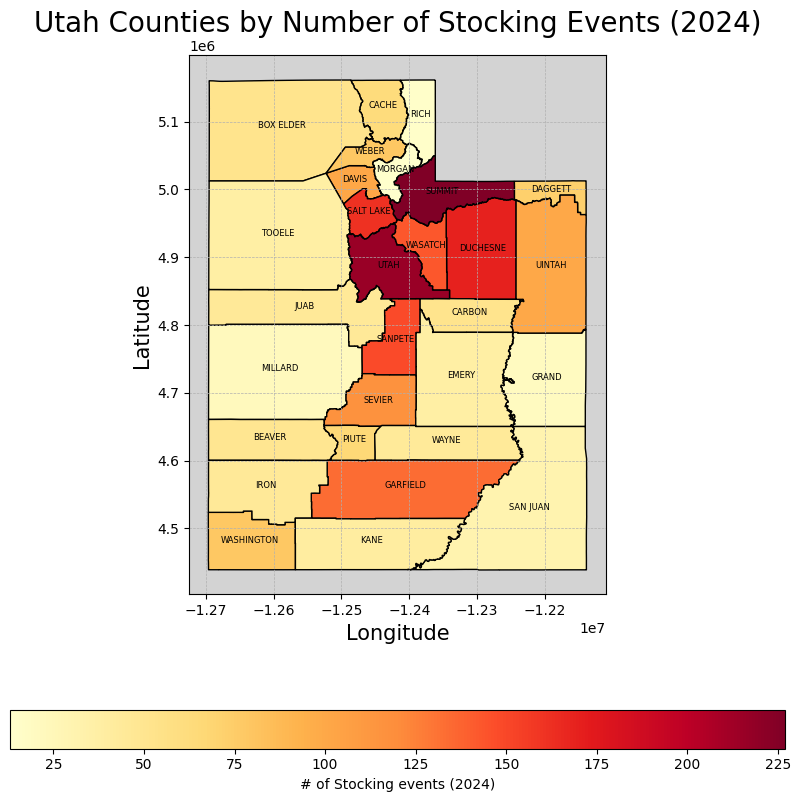

In [23]:
# Stocking data
csv_data = pd.read_csv('Stocking_All_Years.csv')

# Convert the 'Date Stocked' column to datetime format
csv_data['Date Stocked'] = pd.to_datetime(csv_data['Date Stocked'], format='%m/%d/%Y')

# Filter the data for the year 2024
csv_data_2024 = csv_data[csv_data['Date Stocked'].dt.year == 2024]

# Count the number of entries per county in 2024
county_counts_2024 = csv_data_2024['County'].value_counts().reset_index()
county_counts_2024.columns = ['NAME', 'entry_count']  # Rename columns for merging

# Load the shapefile for Utah counties
gdf = gpd.read_file('Counties/Counties.shp')

# Merge the county counts for 2024 with the GeoDataFrame based on the 'NAME' column
gdf = gdf.merge(county_counts_2024, on='NAME', how='left')

# Replace NaN values (counties with no entries in the CSV) with 0
gdf['entry_count'].fillna(0, inplace=True)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the counties with a color scale based on 'entry_count'
gdf.plot(ax=ax, column='entry_count', cmap='YlOrRd', edgecolor='black', legend=True,
         legend_kwds={'label': "# of Stocking events (2024)", 'orientation': "horizontal"})

# Add county names
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['NAME']):
    ax.annotate(label, xy=(x, y), fontsize=6, ha='center')

# Set titles and labels
ax.set_title("Utah Counties by Number of Stocking Events (2024)", fontsize=20)
ax.set_xlabel("Longitude", fontsize=15)
ax.set_ylabel("Latitude", fontsize=15)

# Customize grid and background
ax.grid(True, linestyle='--', linewidth=0.5)
ax.set_facecolor('lightgrey')

# Show the plot
plt.show()

A simple heatmap of stocking events across Utah in 2024 reveals a clear pattern: stocking is largely concentrated in areas with higher human populations. In counties with denser populations, more fish are stocked to meet the increased demand for fishing. This highlights the correlation between human population density and the distribution of stocked bodies of water, as stocking efforts are focused on maintaning bodies of water with the demand of anglers. 

### Vis: Violin Plot of Top 5 Fish Species

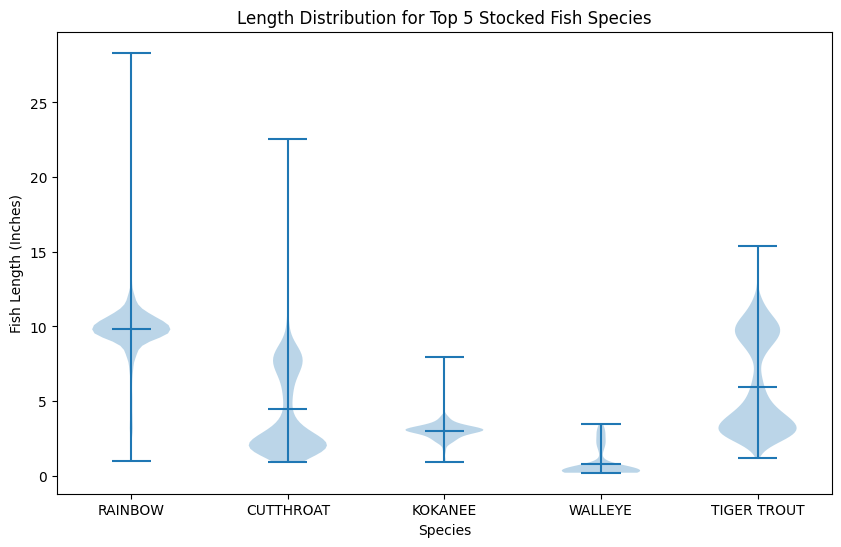

In [24]:
#Selecting only top 5 fish that were stocked the most
species_filter = ['RAINBOW', 'CUTTHROAT', 'KOKANEE', 'WALLEYE', 'TIGER TROUT']
filtered_data = fish_stock_data[fish_stock_data['Species'].isin(species_filter)]

plt.figure(figsize=(10, 6))
plt.violinplot([filtered_data[filtered_data['Species'] == species]['Average Length'] for species in species_filter], showmeans=True)
plt.title('Length Distribution for Top 5 Stocked Fish Species')
plt.xlabel('Species')
plt.ylabel('Fish Length (Inches)')
plt.xticks(ticks=range(1, len(species_filter) + 1), labels=species_filter)
plt.show()

Notes:

Larger distribution of fish length of Rainbow Trout. 

Lots of Walleye underneath mean value. \
-This could be due to introduction of Walleye in 2016 event to help combat illegally planted fertile Walleye population.


### Vis: Heatmap of Month/Day of average stocking count by date

In [25]:
#Include all missing dates
all_dates = pd.date_range(start=fish_stock_data['Date Stocked'].min(), end=fish_stock_data['Date Stocked'].max(), freq='D')
complete_dates_df = pd.DataFrame(all_dates, columns=['Date Stocked'])
complete_dates_df['Year'] = complete_dates_df['Date Stocked'].dt.year
complete_dates_df['Month'] = complete_dates_df['Date Stocked'].dt.month
complete_dates_df['Day'] = complete_dates_df['Date Stocked'].dt.day

daily_counts = fish_stock_data.groupby(['Year', 'Month', 'Day']).size().reset_index(name='Daily Stocking Count')
merged_counts = pd.merge(complete_dates_df, daily_counts, on=['Year', 'Month', 'Day'], how='left').fillna(0)

avg_daily_counts = merged_counts.groupby(['Month', 'Day'])['Daily Stocking Count'].mean().reset_index()
avg_daily_counts = avg_daily_counts.rename(columns={'Daily Stocking Count': 'Daily Stocking Average'})

yearly_counts = fish_stock_data.groupby('Year').size().reset_index(name='Yearly Stocking Count')

heatmap_combined_df = pd.merge(merged_counts, yearly_counts, on='Year', how='left')
heatmap_combined_df = pd.merge(heatmap_combined_df, avg_daily_counts, on=['Month', 'Day'], how='left')
heatmap_combined_df

,Date Stocked,Year,Month,Day,Daily Stocking Count,Yearly Stocking Count,Daily Stocking Average
0,2002-01-07,2002,1,7,2.0,1591,0.869565
1,2002-01-08,2002,1,8,0.0,1591,1.086957
2,2002-01-09,2002,1,9,0.0,1591,0.347826
3,2002-01-10,2002,1,10,0.0,1591,0.695652
4,2002-01-11,2002,1,11,3.0,1591,1.043478
...,...,...,...,...,...,...,...
8340,2024-11-07,2024,11,7,0.0,2143,2.521739
8341,2024-11-08,2024,11,8,0.0,2143,2.695652
8342,2024-11-09,2024,11,9,0.0,2143,2.304348
8343,2024-11-10,2024,11,10,0.0,2143,1.217391


In [26]:
brush_selection = alt.selection_point(encodings=['x', 'y'])

base_plot = alt.Chart(heatmap_combined_df)

# Heatmap
heatmap = base_plot.mark_rect().encode(
    x=alt.X("Day:O", title="Day"),
    y=alt.Y("Month:O", title="Month"),
    color=alt.condition(
        brush_selection,
        alt.Color("Daily Stocking Average:Q", title="Avg Daily Stocking", legend=None),
        alt.value("lightgray")
    ),
    tooltip=['Month:O', 'Day:O', 'Daily Stocking Average:Q']
).add_params(
    brush_selection
).properties(
    title='Average Stocking Count by Date',
    height=400,
    width=800
)

heatmap

alt.Chart(...)

Notes:

Most stocking events occur during the summer, starting from June-August. \
Most occur in July

Not much occurs in Winter months.

This is likely due to introducing the fish in a new environment can cause stress on adult fish and fry. \
Introducing them in the summer helps to minimize mortality rates of stocked fish. Also difficult to stock in winter when water is frozen over. 

### Water Body Data Vis/Exploration

In [27]:
#Number of unique locations for each each Water Body Type 

unique_instances_by_water_body_type = fish_stock_data.groupby('Water Body Type')['Water Name'].nunique().reset_index(name='Unique Instances')
unique_instances_by_water_body_type = unique_instances_by_water_body_type.sort_values(by='Unique Instances', ascending=False)
unique_instances_by_water_body_type

#Caveat is some may not be able to be classified fully correctly using character recognition, so sorted into 'Other' Category

,Water Body Type,Unique Instances
2,Lake,516
3,Other,206
0,Creek,190
5,Reservoir,168
4,Pond,129
6,River,42
1,Fishery,6


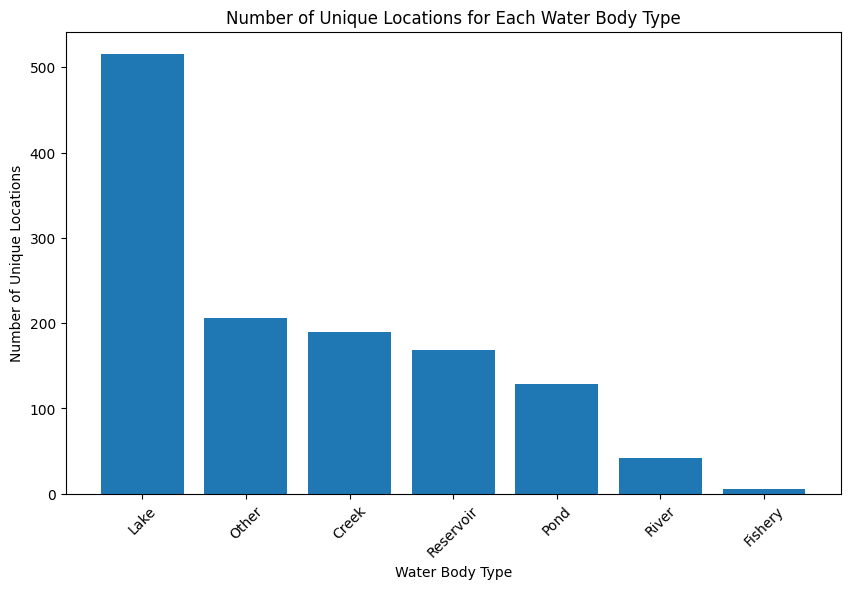

In [28]:
# Plotting the number of unique locations for each Water Body Type
plt.figure(figsize=(10, 6))
plt.bar(unique_instances_by_water_body_type['Water Body Type'], unique_instances_by_water_body_type['Unique Instances'])
plt.title('Number of Unique Locations for Each Water Body Type')
plt.xlabel('Water Body Type')
plt.ylabel('Number of Unique Locations')
plt.xticks(rotation=45)
plt.show()

In [29]:
#Total counts of instances each Water Body Type was stocked

top_water_body_types = fish_stock_data.groupby('Water Body Type')['Quantity'].sum().nlargest(7).reset_index(name='Top Water Body Types')
top_water_body_types


,Water Body Type,Top Water Body Types
0,Reservoir,163565808
1,Lake,35628960
2,River,8116615
3,Pond,6438386
4,Creek,5859874
5,Other,2911689
6,Fishery,220875


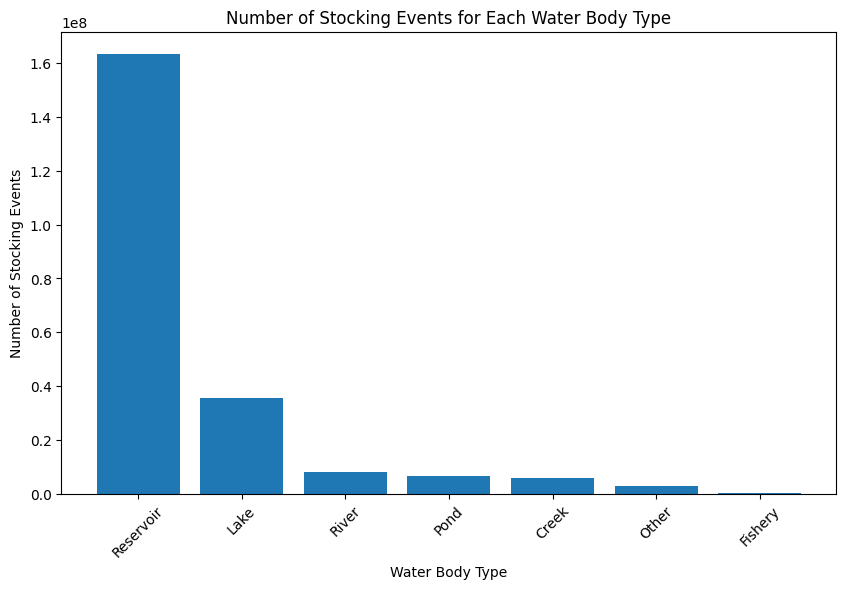

In [30]:
#Plotting the Number of Stocking Events for Each Water Body Type

plt.figure(figsize=(10, 6))
plt.bar(top_water_body_types['Water Body Type'], top_water_body_types['Top Water Body Types'])
plt.title('Number of Stocking Events for Each Water Body Type')
plt.xlabel('Water Body Type')
plt.ylabel('Number of Stocking Events')
plt.xticks(rotation=45)
plt.show()

Notes: 

There are a higher number of Lakes being stocked across Utah, which makes sense when thinking about the number of small lakes in the Uintas that are stocked.

Highest number of fish being stocked is going to Reservoirs, however, and likely due to being the largest bodues of water, and being fished more often by the general population.

## References


https://wildlife.utah.gov/news/wildlife-blog/958-strategy-science-fish-stocking.html#:~:text=In%20contrast%2C%20other%20species%20%E2%80%94%20such,fish%20as%20they%20continued%20growing.

https://wildlife.utah.gov/news/utah-wildlife-news/1821-dwr-stocks-over-10-million-fish-in-utah-in-2023.html

https://wildlife.utah.gov/public_meetings/rac_minutes/2023-08-big-sand-wash-reservoir-fisheries-management-plan.pdf

https://wildlife.utah.gov/news/utah-wildlife-news/1779-dwr-to-harvest-kokanee-salmon-eggs-at-fish-lake-to-help-increase-kokanee-populations.html

https://wildlife.utah.gov/news/utah-wildlife-news/1795-dwr-successfully-hatching-and-raising-tiger-muskies-using-unique-new-method.html
